## Working with Strings in Pandas

In the previous lesson, we learned how to use the apply() and map() methods to apply a function to a series or dataframe. While we could certainly use these methods to clean strings in columns, pandas has built in many vectorized string methods that can perform these tasks quicker and with less keystrokes.

In this lesson, we'll learn a couple other string cleaning tasks such as:

- Finding specific strings or substrings in columns
- Extracting substrings from unstructured data
- Removing strings or substrings from a series

As we learn these tasks, we'll also work to build intuition around how these string methods operate so that you can explore methods we haven't explicitly covered on your own.

We'll work with the 2015 World Happiness Report again and additional economic data from the World Bank. You can find the data set [here](https://www.kaggle.com/datasets/kaggle/world-development-indicators). Here's a preview of the data set:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Below are descriptions for the columns we'll be working with:

In [2]:
happiness2015 = pd.read_csv('../../Datasets/World_Happiness_2015.csv')
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
world_dev = pd.read_csv("../../Datasets/World_dev.csv")
world_dev.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


Below are descriptions for the columns we'll be working with:

- ShortName - Name of the country
- Region - The region the country belongs to
- IncomeGroup - The income group the country belongs to, based on Gross National Income (GNI) per capita
- CurrencyUnit - Name of country's currency
- SourceOfMostRecentIncomeAndExpenditureData - The name of the survey used to collect the income and expenditure data
- SpecialNotes - Contains any miscellaneous notes about the data

In [4]:
happiness2015.shape

(158, 12)

In [5]:
world_dev.shape

(247, 31)

In [6]:
# combine the dataframes
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country',
        right_on='ShortName')
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


In [7]:
merged.rename({'SourceOfMostRecentIncomeAndExpenditureData':'IESurvey'},
             axis=1, inplace=True)

##  Using Apply to Transform Strings

In the last step, we combined happiness2015 and world_dev and assigned the result to merged. Below are the first five rows of merged (after removing some of the columns we don't need):


In [8]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


Let's work with the CurrencyUnit column first. Suppose we wanted to extract the unit of currency without the leading nationality. For example, instead of "Danish krone" or "Norwegian krone", we just needed "krone".

If we wanted to complete this task for just one of the strings, we could use Python's [string.split() method](https://docs.python.org/3/library/stdtypes.html):

In [9]:
words = 'Danish krone'

# Use the string.split() method to return the following list: ['Danish', 'krone']
listwords = words.split()

# Use the index -1 to return the last word of the list.
listwords[-1]

'krone'

Now, to repeat this task for each element in the Series, let's return to a concept we learned in the previous lesson - the [Series.apply() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html).

In [10]:
merged['CurrencyUnit']

0                 Swiss franc
1               Iceland krona
2                Danish krone
3             Norwegian krone
4             Canadian dollar
                ...          
153             Rwandan franc
154    West African CFA franc
155                       NaN
156             Burundi franc
157    West African CFA franc
Name: CurrencyUnit, Length: 158, dtype: object

In [11]:
def extract(element):
    return str(element).split()[-1]

In [12]:
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract)

In [13]:
merged['CurrencyUnit']

0                 Swiss franc
1               Iceland krona
2                Danish krone
3             Norwegian krone
4             Canadian dollar
                ...          
153             Rwandan franc
154    West African CFA franc
155                       NaN
156             Burundi franc
157    West African CFA franc
Name: CurrencyUnit, Length: 158, dtype: object

In [14]:
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

## Vectorized String Methods Overview

In the last exercise, we extracted the last word of each element in the CurrencyUnit column using the Series.apply() method. However, we also learned in the last lesson that we should use built-in vectorized methods (if they exist) instead of the Series.apply() method for performance reasons.

Instead, we could've split each element in the CurrencyUnit column into a list of strings with the [Series.str.split() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html), the vectorized equivalent of Python's string.split() method:

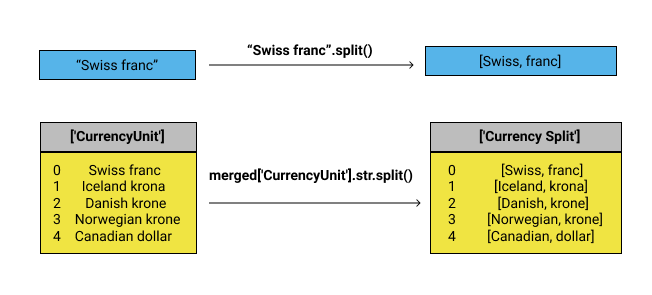

In fact, pandas has built in a number of vectorized methods that perform the same operations for strings in series as Python string methods.

Below are some common vectorized string methods, but you can find the full list [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary):

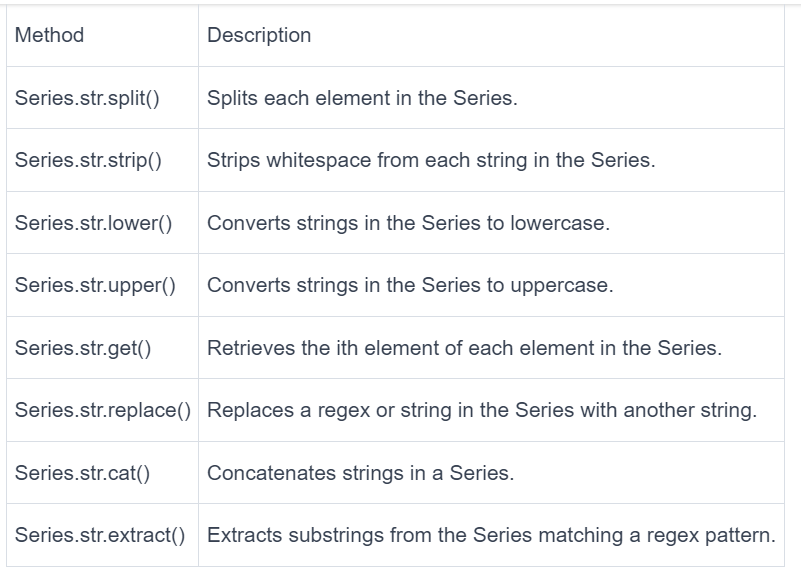

We access these vectorized string methods by adding a str between the Series name and method name:

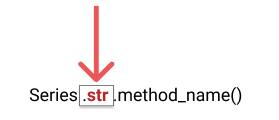


The str attribute indicates that each object in the Series should be treated as a string, without us having to explicitly change the type to a string like we did when using the apply method.

Note that we can also slice each element in the Series to extract characters, but we'd still need to use the str attribute. For example, below we access the first five characters in each element of the CurrencyUnit column:

In [18]:
merged['CurrencyUnit'].str[0:5]

0      Swiss
1      Icela
2      Danis
3      Norwe
4      Canad
       ...  
153    Rwand
154    West 
155      NaN
156    Burun
157    West 
Name: CurrencyUnit, Length: 158, dtype: object

It's also good to know that vectorized string methods can be chained. For example, suppose we needed to split each element in the CurrencyUnit column into a list of strings using the Series.str.split() method and capitalize the letters using the Series.str.upper() method. You can use the following syntax to apply more than one method at once:

In [19]:
merged['CurrencyUnit'].str.upper().str.split()

0                   [SWISS, FRANC]
1                 [ICELAND, KRONA]
2                  [DANISH, KRONE]
3               [NORWEGIAN, KRONE]
4               [CANADIAN, DOLLAR]
                  ...             
153               [RWANDAN, FRANC]
154    [WEST, AFRICAN, CFA, FRANC]
155                            NaN
156               [BURUNDI, FRANC]
157    [WEST, AFRICAN, CFA, FRANC]
Name: CurrencyUnit, Length: 158, dtype: object

However, don't forget to include str before each method name, or you'll get an error!

Below are the first five rows of the result:

Let's practice using vectorized string methods next.

In [27]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(1)

In [28]:
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

## Exploring Missing Values with Vectorized String Methods

We learned that using vectorized string methods results in:

- Better performance
- Code that is easier to read and write

Let's explore another benefit of using vectorized string methods next. Suppose we wanted to compute the length of each string in the CurrencyUnit column. If we use the Series.apply() method, what happens to the missing values in the column?

First, let's use the [Series.isnull() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isnull.html) to confirm if there are any missing values in the column:

In [29]:
merged['CurrencyUnit'].isnull().sum()

13

So, we know that the CurrencyUnit column has 13 missing values.

Next, let's create a function to return the length of each currency unit and apply it to the CurrencyUnit column:

In [30]:
def compute_lengths(element):
    return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

Then, we can check the number of missing values in the result by setting the dropna parameter in the Series.value_counts() method to False:

In [31]:
lengths_apply.value_counts(dropna=False)

CurrencyUnit
14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
23     1
10     1
39     1
20     1
Name: count, dtype: int64

Since the original column had 13 missing values and NaN doesn't appear in the list of unique values above, we know our function must have treated NaN as a string and returned a length of 3 for each NaN value. This doesn't make sense - missing values shouldn't be treated as strings. They should instead have been excluded from the calculation.

If we wanted to exclude missing values, we'd have to update our function to something like this:

In [62]:
def compute_lengths(element):
        if pd.isna(element):
            pass
        else:
            return len(str(element))

In [63]:
merged['CurrencyUnit'].apply(compute_lengths)

0      11.0
1      13.0
2      12.0
3      15.0
4      15.0
       ... 
153    13.0
154    22.0
155     NaN
156    13.0
157    22.0
Name: CurrencyUnit, Length: 158, dtype: float64

Let's confirm the behavior of pandas' vectorized string methods next.

In [64]:
merged['CurrencyUnit'].str.len()

0      11.0
1      13.0
2      12.0
3      15.0
4      15.0
       ... 
153    13.0
154    22.0
155     NaN
156    13.0
157    22.0
Name: CurrencyUnit, Length: 158, dtype: float64

In [67]:
lengths = merged['CurrencyUnit'].str.len()
lengths.value_counts(dropna=False)

CurrencyUnit
14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
26.0     1
23.0     1
10.0     1
39.0     1
20.0     1
Name: count, dtype: int64

Series.str.len() method excluded the NaNs and didn't treat them as strings.

## Finding Specific Words in Strings

In the last exercise, we identified a third benefit of using vectorized string methods - they exclude missing values:



- Better performance
- Code that is easier to read and write
- Automatically excludes missing values

Now that we know the benefits of using vectorized string methods, let's practice using them for specific data cleaning tasks.

Suppose we needed to parse the elements of a Series to find a string or substring that doesn't appear in the same position in each string. For example, let's look at the SpecialNotes column. A number of rows mention "national accounts", but the words appear in different places in each comment:

April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the **base year** changed to 2002.
Based on IMF data, national accounts data have been revised for 2005 onward; the new base year is 2005.

If we wanted to determine how many comments contain this phrase, could we split them into lists? Since the formats are different, how could we tell which element contains the "national accounts" phrase?

We can handle problems like this with regular expressions, or regex for short. A regular expression is a sequence of characters that defines a search pattern, used to match characters in a string:

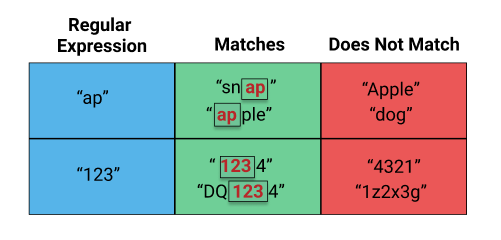

In pandas, regular expression is integrated with vectorized string methods to make finding and extracting patterns of characters easier. However, the rules for creating regular expressions can be quite complex, so don't worry about memorizing them. In this lesson, we'll provide guidance on how to create the regex we need to use for the exercises, but you can also follow along using [this documentation](https://docs.python.org/3/library/re.html).

In [68]:
pattern = r"[Nn]ational accounts"

In [70]:
merged['SpecialNotes'].str.contains(pattern)

0       NaN
1       NaN
2       NaN
3       NaN
4      True
       ... 
153    True
154     NaN
155     NaN
156     NaN
157    True
Name: SpecialNotes, Length: 158, dtype: object

In [71]:
pattern = r"[Nn]ational accounts"


national_accounts = merged['SpecialNotes'].str.contains(pattern)
print(national_accounts.head())

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object


In the last screen, we used the Series.str.contains() method to see if a specific phrase appeared in a series. The result was a series containing True, False, and missing values:

In [72]:
national_accounts = merged['SpecialNotes'].str.contains(r"[Nn]ational accounts")

#Return the value counts for each value in the Series, including missing values.
national_accounts.value_counts(dropna=False)

SpecialNotes
NaN      65
True     54
False    39
Name: count, dtype: int64

Now, we should be able to use boolean indexing to return only the rows that contain "national accounts" or "National accounts" in the SpecialNotes column:

In [73]:
merged[national_accounts]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

It looks like we got an error now because of the NaN values! One way we could fix this is to change the NaN values to False in national_accounts.

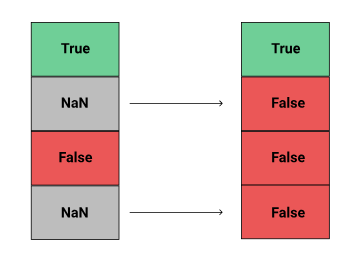

In [78]:
national_accounts = merged['SpecialNotes'].str.contains(pattern,na=False)
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,Zealand
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


##  Extracting Substrings from a Series

In the last screen, we learned how to use regular expressions and the Series.str.contains() method to search for patterns of characters in a column and index the dataframe based on the matches. Let's continue exploring the versatility of regular expressions while learning a new task - extracting characters from strings.

Suppose we wanted to extract any year mentioned in the SpecialNotes column. Notice that the characters in a year follow a specific pattern:

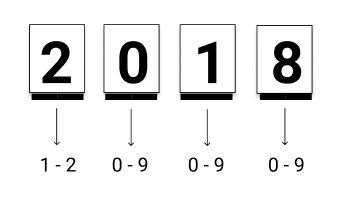


The first digit can be either 1 or 2, while the last three digits can be any number between 0 and 9.

With regular expressions, we use the following syntax to indicate a character could be a range of numbers:

In [79]:
pattern = r"[0-9]"

And we use the following syntax to indicate a character could be a range of letters:

In [80]:
#lowercase letters
pattern1 = r"[a-z]"

#uppercase letters
pattern2 = r"[A-Z]"

We could also make these ranges more restrictive. For example, if we wanted to find a three character substring in a column that starts with a number between 1 and 6 and ends with two letters of any kind, we could use the following syntax:

In [81]:
pattern = r"[1-6][a-z][a-z]"

If we have a pattern that repeats, we can also use curly brackets { and } to indicate the number of times it repeats:

pattern = r"[1-6][a-z][a-z]" = r"[1-6][a-z]{2}"

Let's use what we've learned to explore the [Series.str.extract() method](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html).

In [88]:
pattern = r"([1-2][0-9]{3})"

In [89]:
merged['SpecialNotes'].str.extract(pattern)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


In the last exercise, we learned how to identify more complex patterns with regular expressions and extract substrings from a column using that pattern.

When we used the Series.str.extract() method, we enclosed our regular expression in parentheses. The parentheses indicate that only the character pattern matched should be extracted and returned in a series. We call this a capturing group.

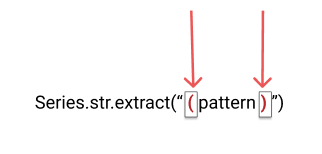

If the capturing group doesn't exist in a row (or there is no match) the value in that row is set to NaN instead. As a result, the Series returned looked like this:

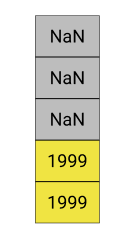

## Extracting All Matches of a Pattern from a Series

 In the last couple of screens, we learned we could use the Series.str.extract() method to extract a pattern of characters from a column as a dataframe. However, the Series.str.extract() method will only extract the first match of the pattern. If we wanted to extract all of the matches, we can use the [Series.str.extractall() method](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html).

We'll demonstrate this method but, first, let's make the results easier to read by using the [df.set_index() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html) to set the Country column as the index.

In [90]:
merged = merged.set_index('Country')

Next, let's use the same regular expression from the last screen to extract all the years from the Special Notes column, except this time, we'll use a named capturing group. Using a named capturing group means that we can refer to the group by the specified name instead of just a number. We can use the following syntax to add a name: (?P<Column_Name>...).

Below, we name the capturing group Years:

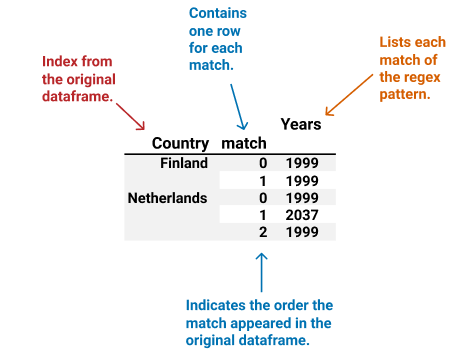

Let's look at the IESurvey column next. This column has years in two different formats:

Integrated household survey (IHS), 2012

Integrated household survey (IHS), 2010/11

In [93]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
merged['SpecialNotes'].str.extractall(pattern)

Years
Country     match      
Finland     0      1999
            1      1999
Netherlands 0      1999
            1      2037
            2      1999
...                 ...
Rwanda      1      2011
            2      2008
Togo        0      2013
            1      2000
            2      2000

[164 rows x 1 columns]

In [102]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged['IESurvey'].str.extractall(pattern)

In [106]:
years

,,Years
Country,match,
Switzerland,0,2004
Iceland,0,2010
Denmark,0,2010
Norway,0,2010
Canada,0,2010
...,...,...
Afghanistan,0,2008
Rwanda,0,2010
Benin,0,2011


In [104]:
years['Years'].value_counts()

Years
2012    33
2010    28
2011    22
2013    12
2009     8
2005     6
2008     6
2007     4
2004     3
1995     1
2002     1
1998     1
1999     1
1992     1
2000     1
2003     1
2006     1
Name: count, dtype: int64

In [105]:
merged['IESurvey']

Country
Switzerland       Expenditure survey/budget survey (ES/BS), 2004
Iceland                  Integrated household survey (IHS), 2010
Denmark                         Income tax registers (ITR), 2010
Norway                                  Income survey (IS), 2010
Canada                            Labor force survey (LFS), 2010
                                     ...                        
Rwanda                Integrated household survey (IHS), 2010/11
Benin          Core Welfare Indicator Questionnaire Survey (C...
Syria                                                        NaN
Burundi        Core Welfare Indicator Questionnaire Survey (C...
Togo           Core Welfare Indicator Questionnaire Survey (C...
Name: IESurvey, Length: 158, dtype: object

## Extracting More Than One Group of Patterns from a Series

When we tried to extract all of the years from the IESurvey column using the extractall method in the last exercise, we were unsuccessful because some of our years had the following format:

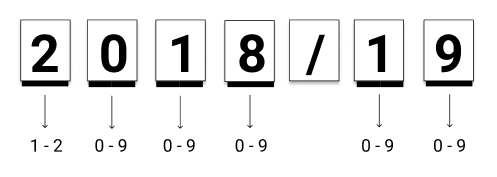

Because our regular expression only accounted for the pattern highlighted below, we created a dataframe with just the first year in each row:

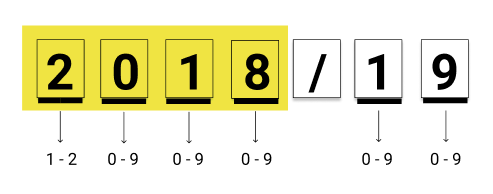

If we wanted to extract the second, abbreviated year, we'd have to specify two more groups - one to extract the / and one to extract the last two digits.

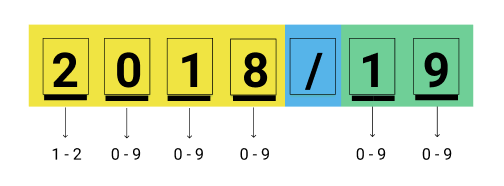

Let's add those two groups to our regex and try to extract them again:

In [109]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)

Note that we also added a question mark, ?, after each of the two new groups to indicate that a match for those groups is optional. This allows us to extract years listed in the yyyy format AND the yyyy/yy format at once.

Below are the first five rows:

In [110]:
years.head()

,,First_Year,1,Second_Year
Country,match,,,
Switzerland,0,2004,NaN,NaN
Iceland,0,2010,NaN,NaN
Denmark,0,2010,NaN,NaN
Norway,0,2010,NaN,NaN
Canada,0,2010,NaN,NaN


If we sort the values, we can confirm that we also extracted years in the yyyy/yy format:

In [113]:
years.sort_values('Second_Year').head()

,,First_Year,1,Second_Year
Country,match,,,
Kenya,0,2005,/,06
Angola,0,2008,/,09
Mozambique,0,2008,/,09
Nigeria,0,2009,/,10
Mali,0,2009,/,10


The dataframe returned has three columns - one for each capturing group specified in pattern. Because we didn't name the second group, (/), the capturing group number, 1, was used as the column name.

In the next exercise, we'll extract just the years from the IESurvey column. Then, we'll reformat the second year so that it contains all four digits of the year, not just the last two, so that it looks like the dataframe below:

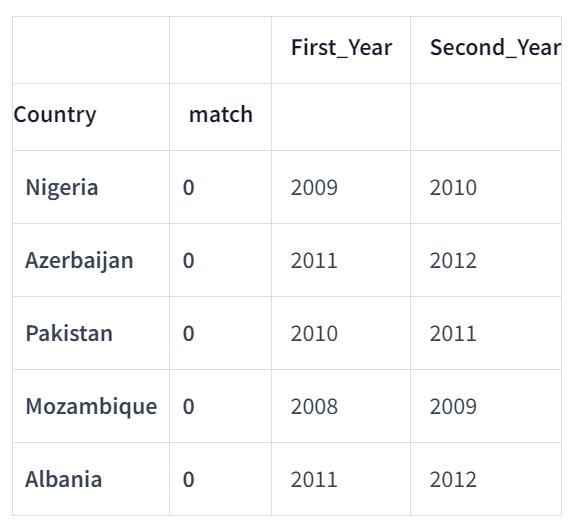

We've already created a regular expression that extracts the pattern "yyyy/yy" and saved it to a variable called pattern. Notice that we didn't enclose /? in parentheses so that the resulting dataframe will only contain a First_Year and Second_Year column.

In [114]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)

In [115]:
years

,,First_Year,Second_Year
Country,match,,
Switzerland,0,2004,NaN
Iceland,0,2010,NaN
Denmark,0,2010,NaN
Norway,0,2010,NaN
Canada,0,2010,NaN
...,...,...,...
Afghanistan,0,2008,NaN
Rwanda,0,2010,11
Benin,0,2011,12


In [119]:
years['Second_Year'] = years['First_Year'].str[:2] + years['Second_Year']

In [120]:
years.head()

,,First_Year,Second_Year
Country,match,,
Switzerland,0,2004,NaN
Iceland,0,2010,NaN
Denmark,0,2010,NaN
Norway,0,2010,NaN
Canada,0,2010,NaN


## Challenge: Clean a String Column, Aggregate the Data, and Plot the Results

Let's summarize what we learned about the Series.str.extractall() method and pandas string operations in the last exercise:

Let's summarize what we learned about the Series.str.extractall() method and pandas string operations in the last exercise:

1. If part of the regex isn't grouped using parantheses, (), it won't be extracted.
2. When we add a string to a column using the plus sign, +, pandas will add that string to every value in the column. Note that the strings will be added together without any spaces.

Unfortunately, there are too many possible string cleaning tasks for us to review each one in detail. However, now that we have a general understanding of how string methods operate, we can apply our knowledge to tasks we haven't covered explicitly in this lesson.

Next, we'll group merged by the IncomeGroup column and plot the results. First, however, we would like to clean the values in the IncomeGroup column to a standardized format shown in the table below.

In [122]:
merged['IncomeGroup'].value_counts()

IncomeGroup
Upper middle income     39
Lower middle income     35
High income: OECD       30
Low income              24
High income: nonOECD    17
Name: count, dtype: int64

In [129]:
merged['IncomeGroup'].tail(50)

Country
Bangladesh                  Lower middle income
Iran                        Upper middle income
Ukraine                     Lower middle income
Iraq                        Upper middle income
South Africa                Upper middle income
Ghana                       Lower middle income
Zimbabwe                             Low income
Liberia                              Low income
India                       Lower middle income
Sudan                       Lower middle income
Haiti                                Low income
Congo (Kinshasa)                            NaN
Nepal                                Low income
Ethiopia                             Low income
Sierra Leone                         Low income
Mauritania                  Lower middle income
Kenya                       Lower middle income
Djibouti                    Lower middle income
Armenia                     Lower middle income
Botswana                    Upper middle income
Myanmar                     Lowe

In [150]:
first = merged['IncomeGroup'].str.split('income').str[0].str.strip()
last = merged['IncomeGroup'].str.split('income').str[1].str.strip()
final = first + last
final = final.str.replace(': ', ' ').str.upper()
merged['IncomeGroupCleaned'] = final
final.value_counts()

IncomeGroup
UPPER MIDDLE    39
LOWER MIDDLE    35
HIGH OECD       30
LOW             24
HIGH NONOECD    17
Name: count, dtype: int64

In [149]:
pv_income

,Happiness Score
IncomeGroup,
High income: OECD,6.674000
High income: nonOECD,6.250765
Low income,3.925625
Lower middle income,4.927971
Upper middle income,5.426718


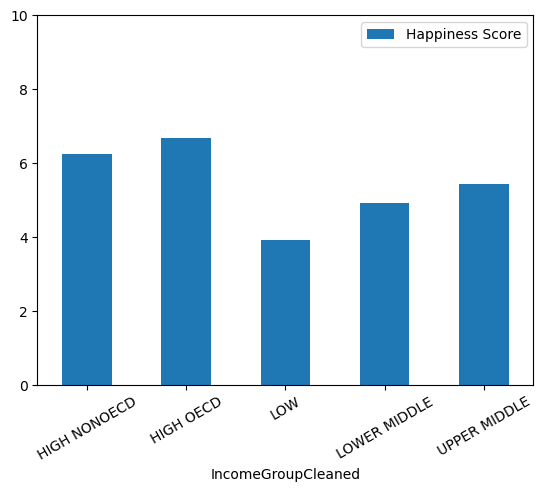

In [152]:
pv_incomes = merged.pivot_table(index='IncomeGroupCleaned', values='Happiness Score')
pv_incomes.plot(kind='bar', ylim=(0,10), rot=30)
# plt.xticks(rotation=30)
plt.show()

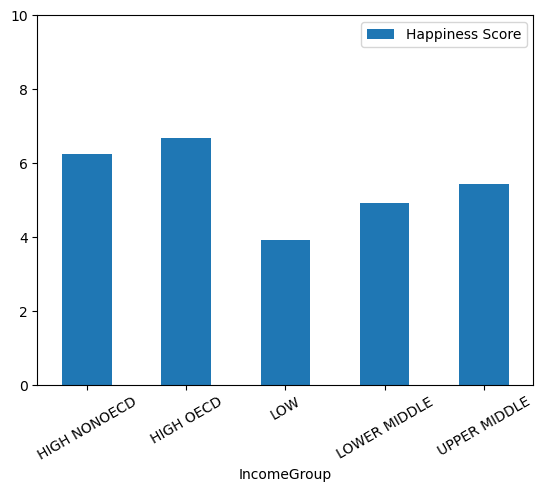

In [153]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()

In this lesson, we explored the benefits of using vectorized string methods, along with a couple methods that can be used to perform tasks such as finding substrings, extracting substrings, and removing substrings from columns. You can find the full list of vectorized string methods [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary). We encourage you to explore more string methods or string cleaning tasks independently.

In the next lesson, we'll return to another important data cleaning task - how to handle missing values.